# 示例：获取轴承的原始信号

In [1]:
from rulframework.data.feature.RMSFeatureExtractor import RMSFeatureExtractor
from rulframework.data.raw.XJTUDataLoader import XJTUDataLoader
from rulframework.data.stage.BearingStageCalculator import BearingStageCalculator
from rulframework.data.stage.eol.NinetyThreePercentRMSEoLCalculator import NinetyThreePercentRMSEoLCalculator
from rulframework.data.stage.fpt.ThreeSigmaFPTCalculator import ThreeSigmaFPTCalculator
from rulframework.util.Plotter import Plotter

## 1.使用西交大轴承数据加载器

In [2]:
data_loader = XJTUDataLoader('D:\\data\\dataset\\XJTU-SY_Bearing_Datasets')

DEBUG - 19:31:04 >> 
<<<< 数据集位置：D:\data\dataset\XJTU-SY_Bearing_Datasets >>>>
>> 已成功登记以下数据项：
  Bearing1_1，位置: D:\data\dataset\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_1
  Bearing1_2，位置: D:\data\dataset\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_2
  Bearing1_3，位置: D:\data\dataset\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_3
  Bearing1_4，位置: D:\data\dataset\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_4
  Bearing1_5，位置: D:\data\dataset\XJTU-SY_Bearing_Datasets\35Hz12kN\Bearing1_5
  Bearing2_1，位置: D:\data\dataset\XJTU-SY_Bearing_Datasets\37.5Hz11kN\Bearing2_1
  Bearing2_2，位置: D:\data\dataset\XJTU-SY_Bearing_Datasets\37.5Hz11kN\Bearing2_2
  Bearing2_3，位置: D:\data\dataset\XJTU-SY_Bearing_Datasets\37.5Hz11kN\Bearing2_3
  Bearing2_4，位置: D:\data\dataset\XJTU-SY_Bearing_Datasets\37.5Hz11kN\Bearing2_4
  Bearing2_5，位置: D:\data\dataset\XJTU-SY_Bearing_Datasets\37.5Hz11kN\Bearing2_5
  Bearing3_1，位置: D:\data\dataset\XJTU-SY_Bearing_Datasets\40Hz10kN\Bearing3_1
  Bearing3_2，位置: D:\data\dataset\XJTU-S

### 获取轴承1_3原始振动信号并输出

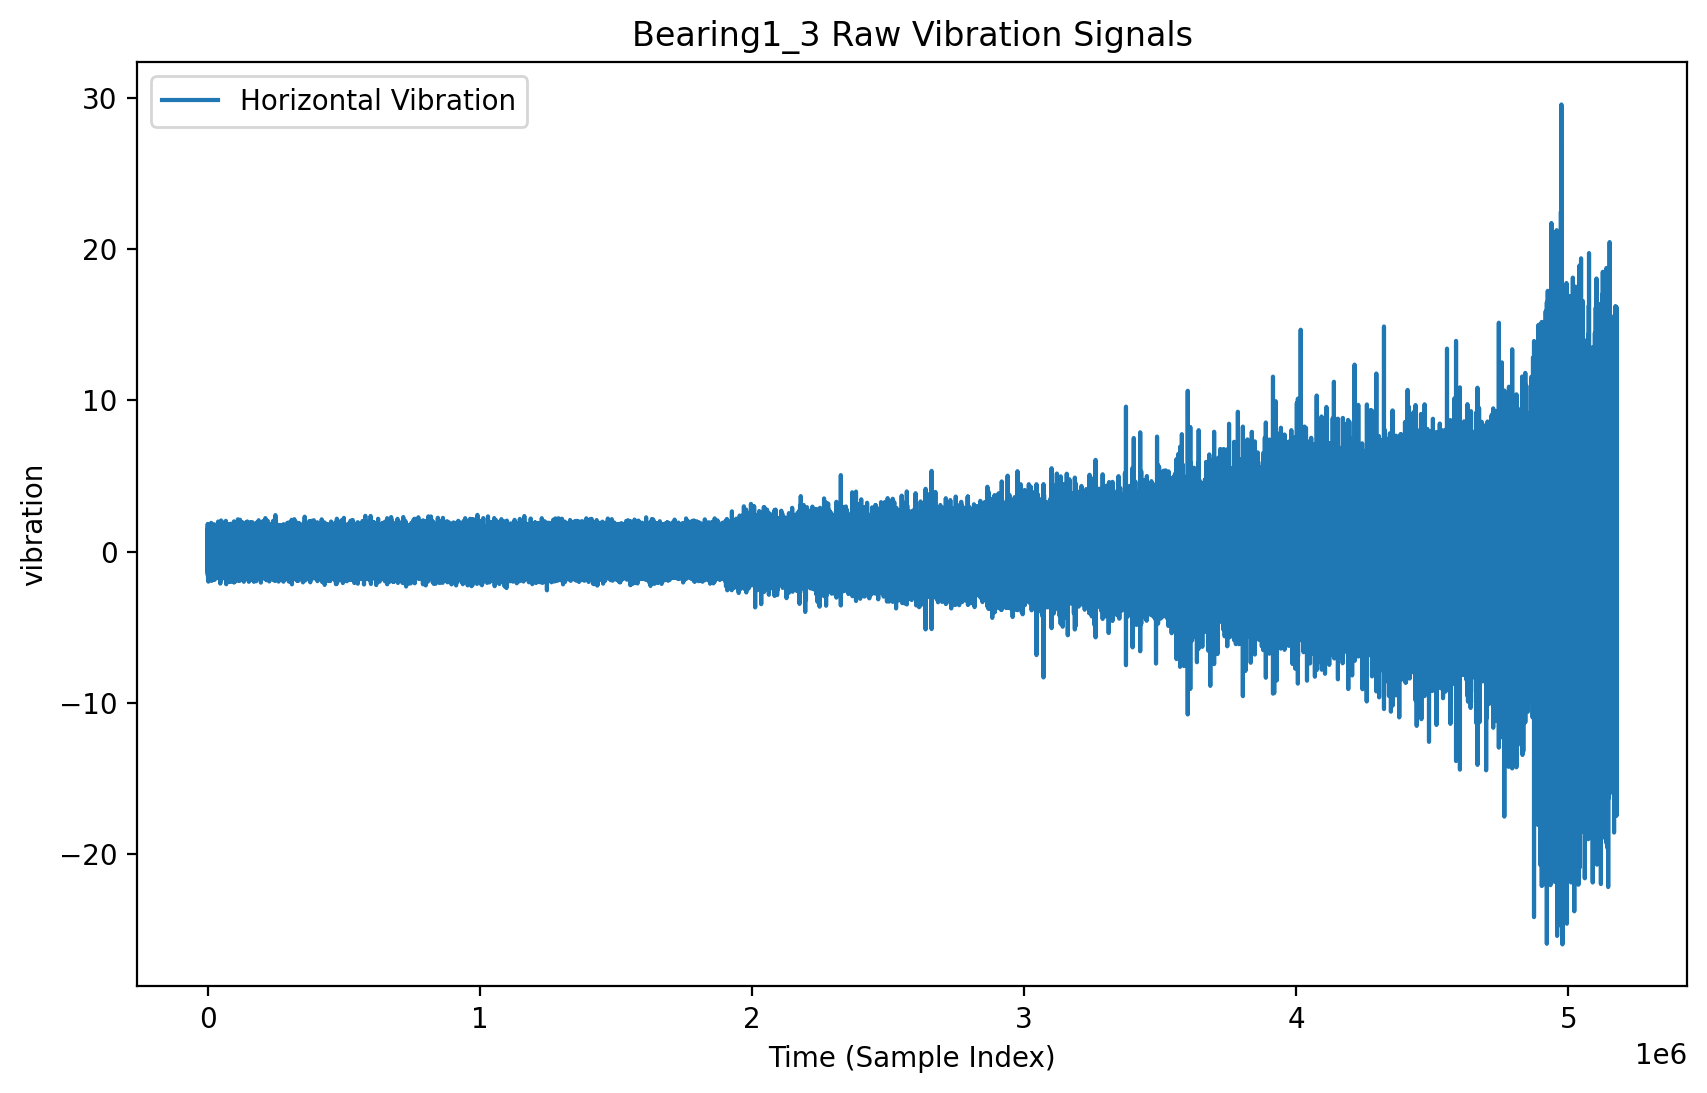

In [3]:
bearing = data_loader.get_bearing("Bearing1_3", 'Horizontal Vibration')
Plotter.raw(bearing)

### 获取退化特征（这里使用RMS）

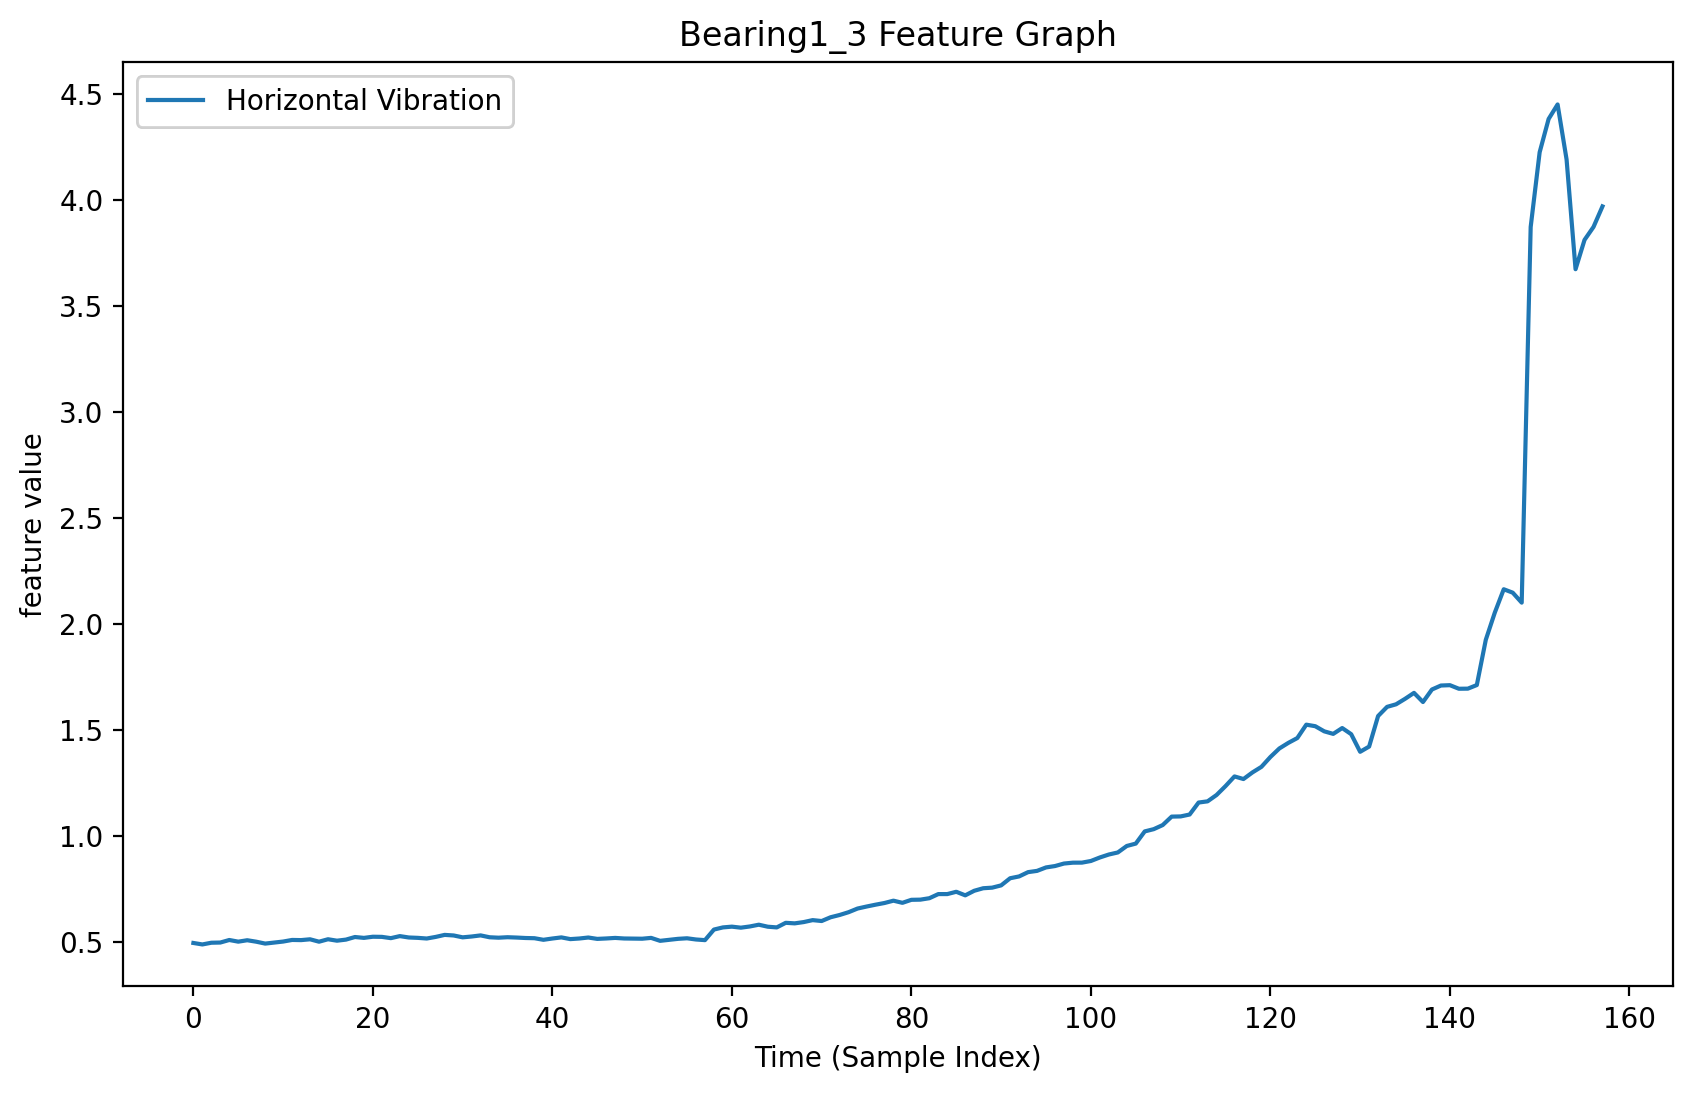

In [4]:
feature_extractor = RMSFeatureExtractor(data_loader.continuum)
bearing.feature_data = feature_extractor.extract(bearing.raw_data)
Plotter.feature(bearing)

### 划分轴承的退化阶段及失效阈值
- 3σ原则计算FPT

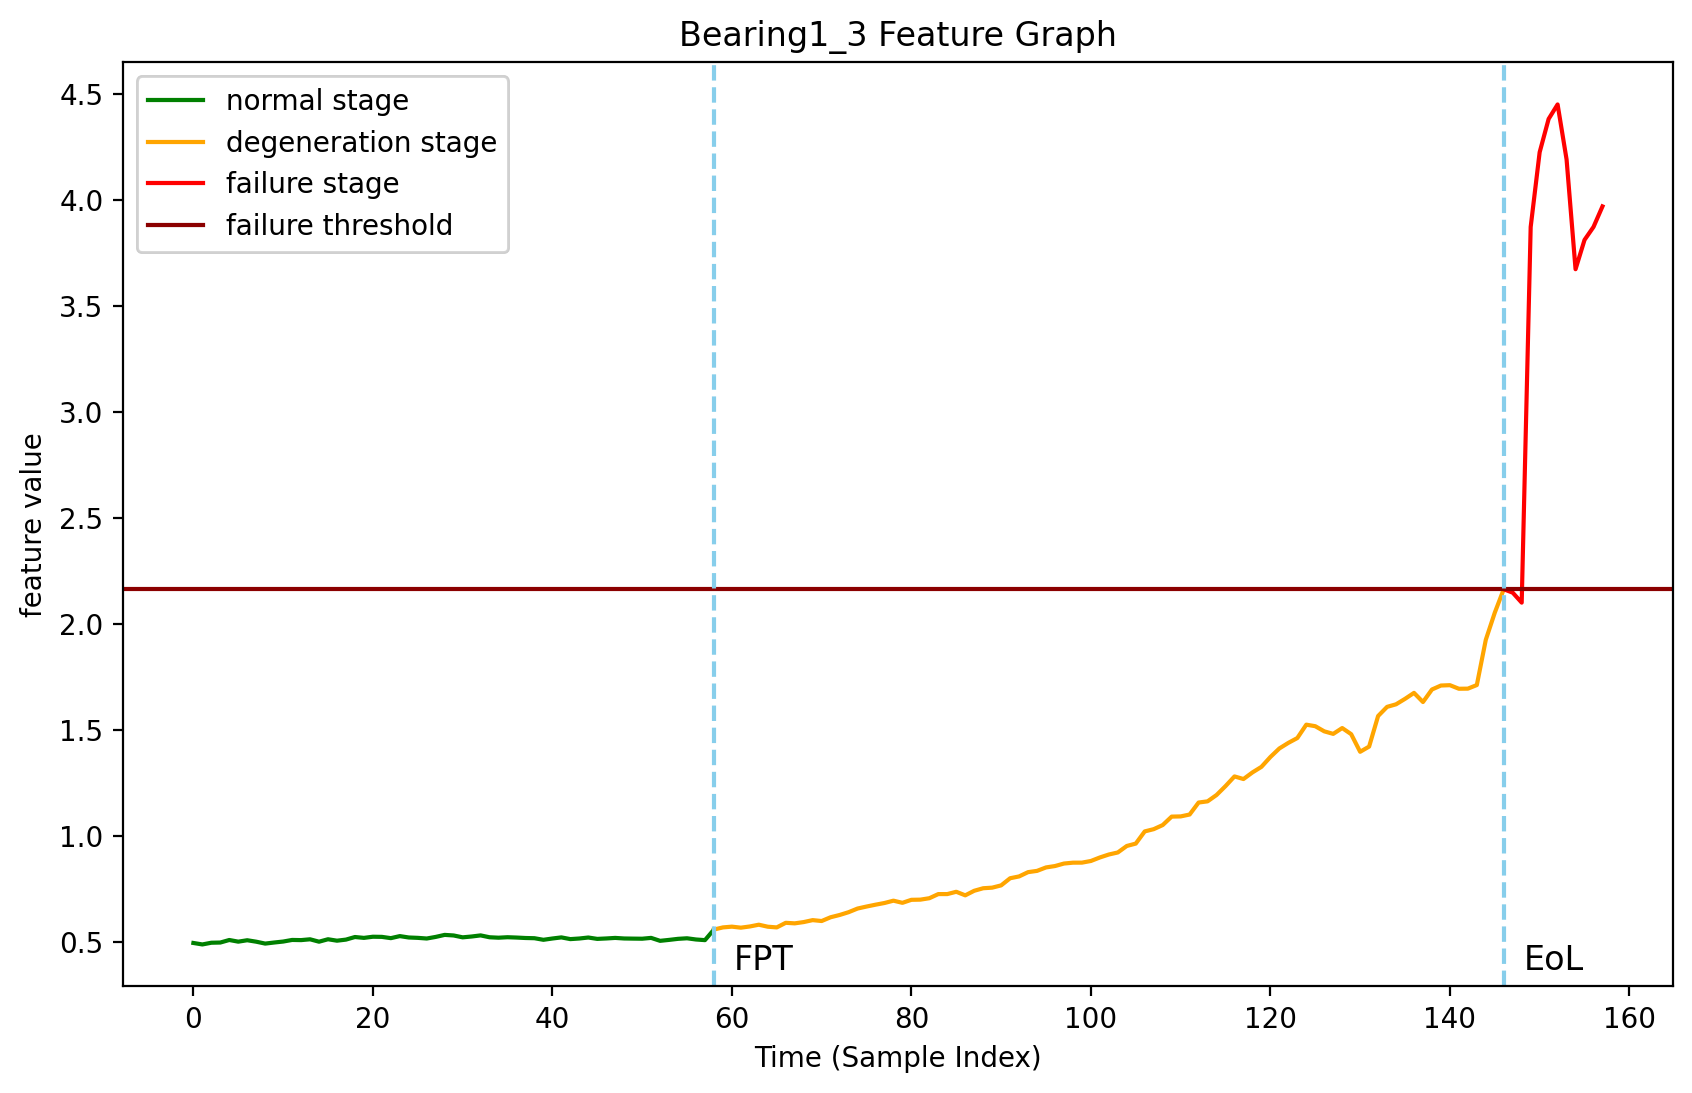

In [5]:
fpt_calculator = ThreeSigmaFPTCalculator()
eol_calculator = NinetyThreePercentRMSEoLCalculator()
stage_calculator = BearingStageCalculator(fpt_calculator, eol_calculator, data_loader.continuum)
stage_calculator.calculate_state(bearing)

Plotter.feature(bearing)